# **Import**

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Data Load**

In [3]:
cd /content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data

/content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data


In [4]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f's_{i + 1}' for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_df = pd.read_csv('./train_FD003.txt',
                       sep='\s+',
                       header=None,
                       index_col=False,
                       names=col_names)
test_df = pd.read_csv('./test_FD003.txt',
                      sep='\s+',
                      index_col=False,
                      names=col_names)
RUL_df = pd.read_csv('./RUL_FD003.txt',
                     sep='\s+',
                     index_col=False,
                     names=['RUL'])

In [5]:
train_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [6]:
train_df.to_csv('./train_FD003.csv')

In [7]:
test_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,529.23,2388.24,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,529.27,2388.26,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,529.48,2388.28,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,529.39,2388.33,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687


In [8]:
test_df.to_csv('./test_FD003.csv')

In [9]:
RUL_df

,RUL
0,44
1,51
2,27
3,120
4,101
...,...
95,113
96,123
97,17
98,8


In [10]:
RUL_df.to_csv('./RUL_FD003.csv')

# **EDA**

## **s1 ~ s21**

In [11]:
max_cycle = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycle, on='unit_number', how='left')

train_df['RUL'] = train_df['max_cycle'] - train_df['time_cycles']

In [12]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data_rolling = unit_data.rolling(10).mean()
        plt.plot(unit_data_rolling['RUL'], unit_data_rolling[sensor], alpha=0.7)

        sensor_values.extend(unit_data_rolling[sensor].dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(sensor)
    plt.title(f'Trend of {sensor} Across Sampled Units (Std: {sensor_std:.2f})')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).mean()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

        sensor_values.extend(sensor_norm_rolling.dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling mean)')
    plt.title(f'Normalized Trend of {sensor} Across Units (Std: {sensor_std:.2f})')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [14]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()

        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [15]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).std()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling std)')
    plt.title(f'Normalized Trend of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [16]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [17]:
for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        rolling_std_norm = (unit_data['rolling_std'] - unit_data['rolling_std'].min()) / \
                           (unit_data['rolling_std'].max() - unit_data['rolling_std'].min())
        plt.plot(unit_data['RUL'], rolling_std_norm, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Normalized Rolling Std')
    plt.title(f'Normalized Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

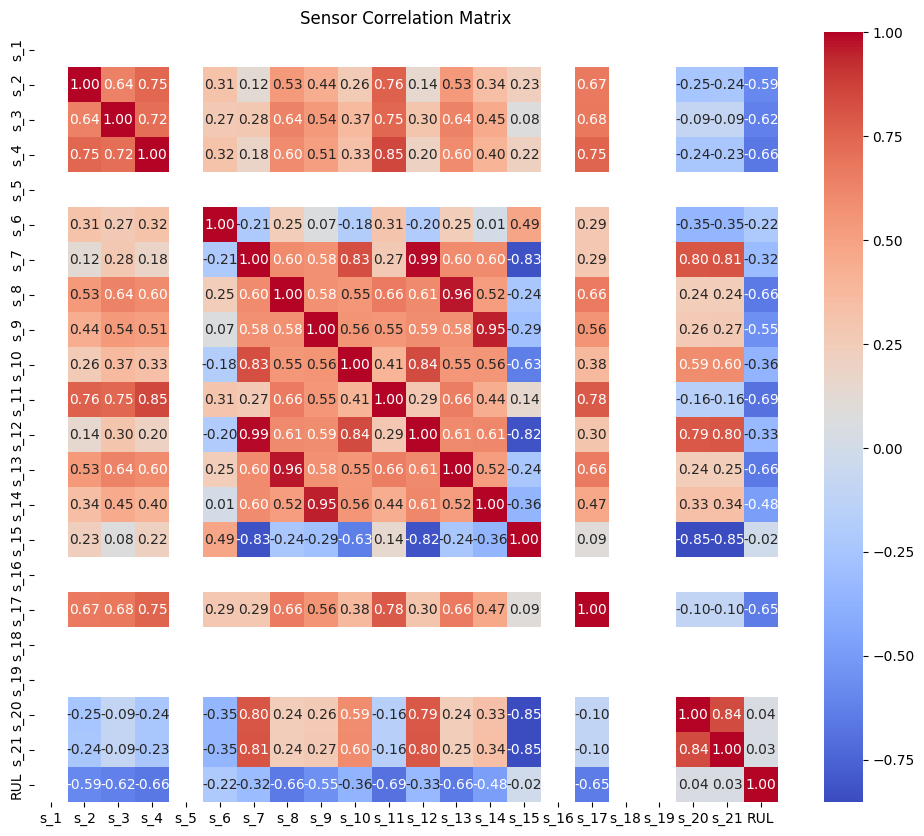

In [18]:
sensor_data = train_df[sensor_names + ['RUL']]
corr = sensor_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sensor Correlation Matrix")
plt.show()

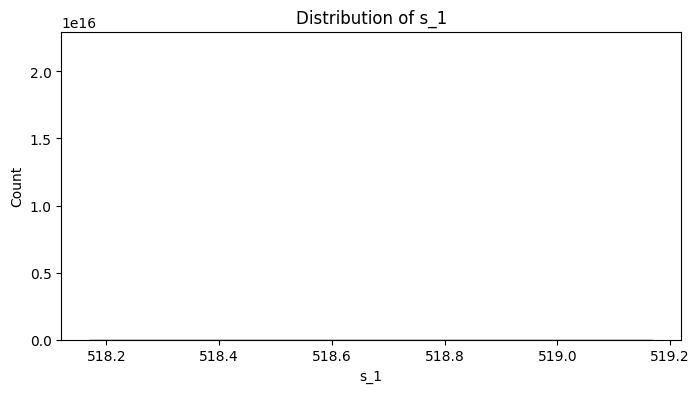

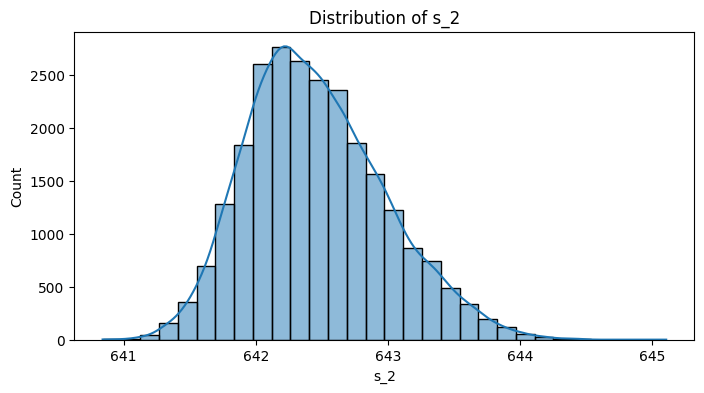

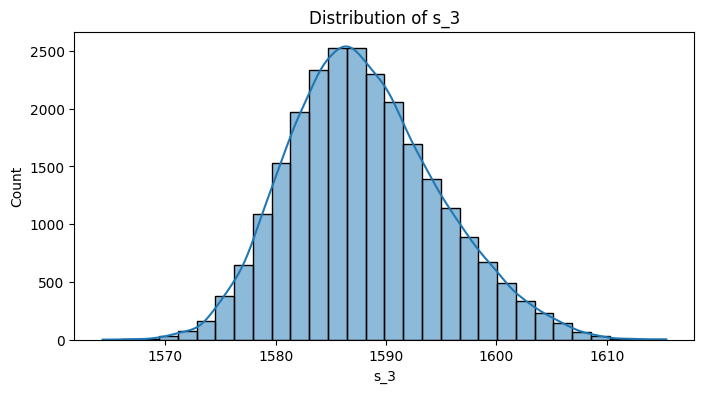

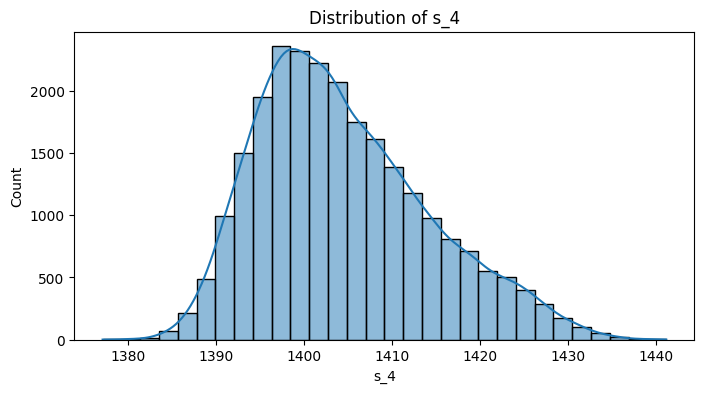

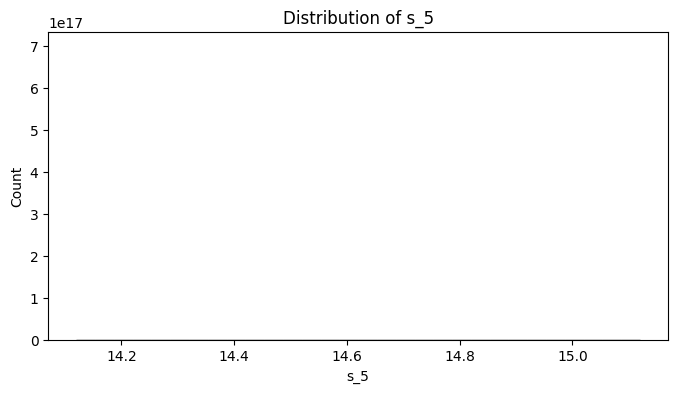

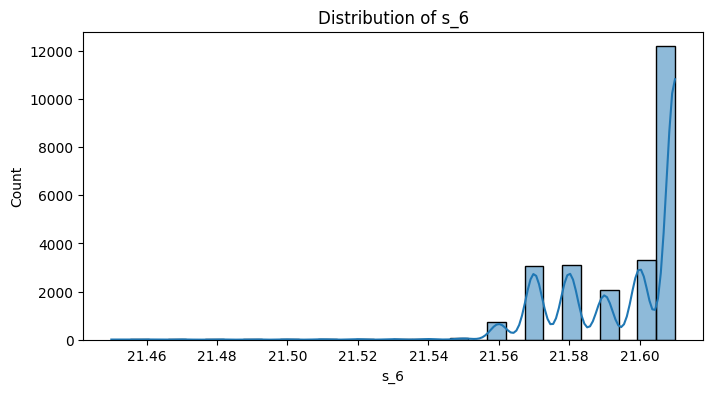

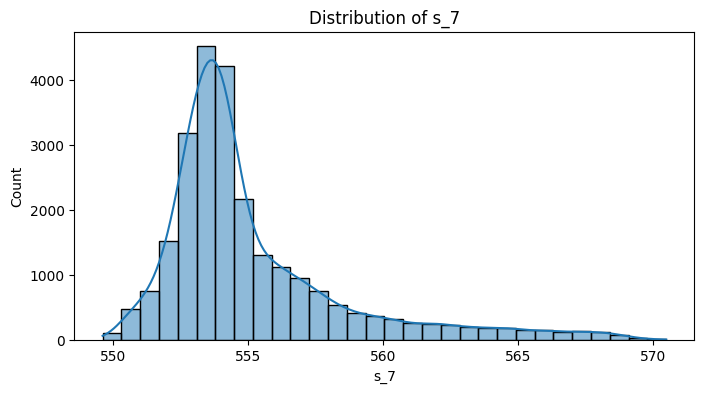

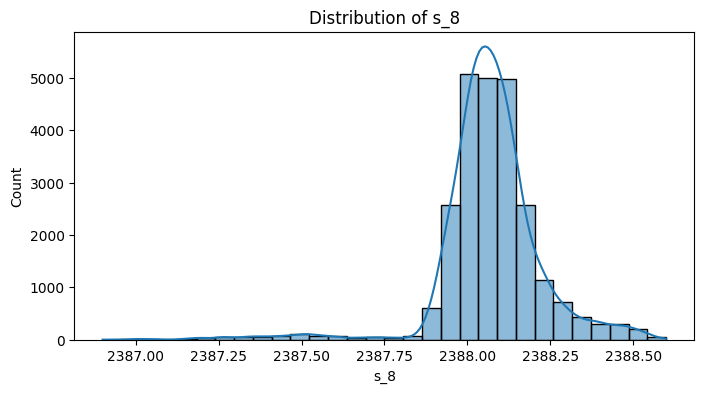

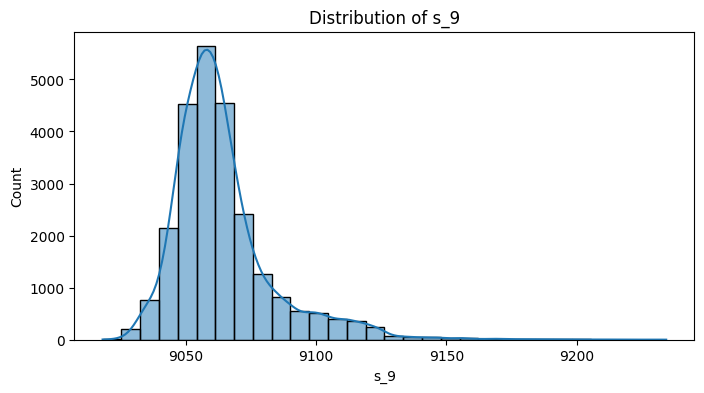

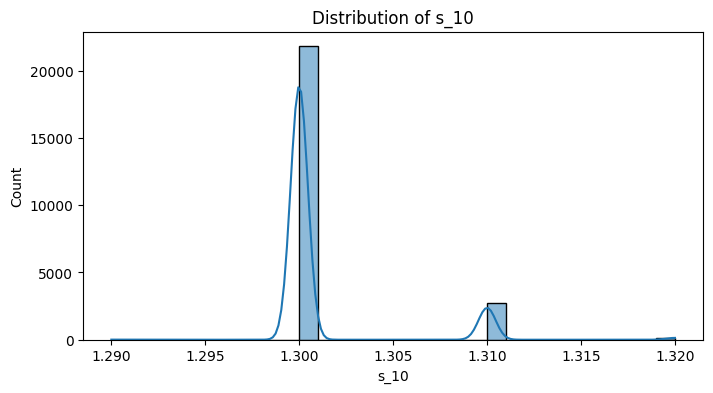

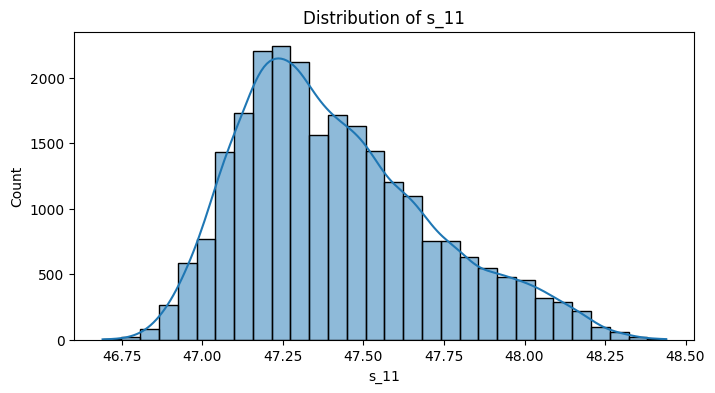

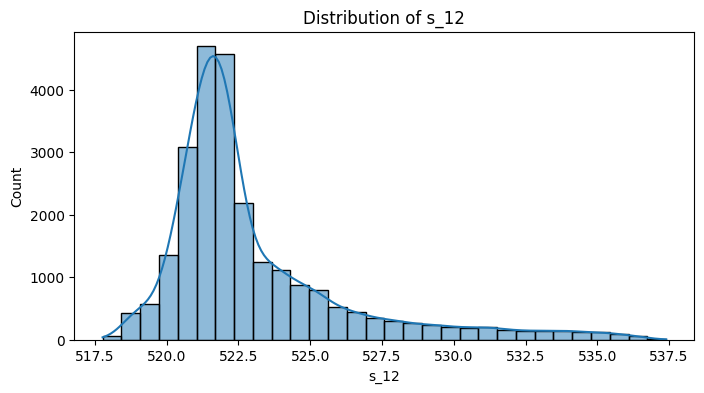

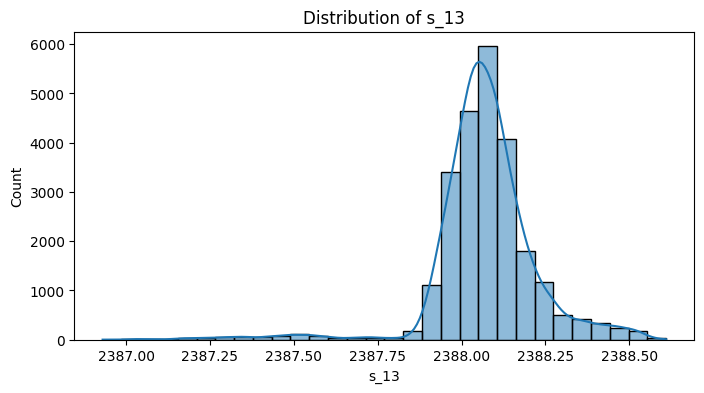

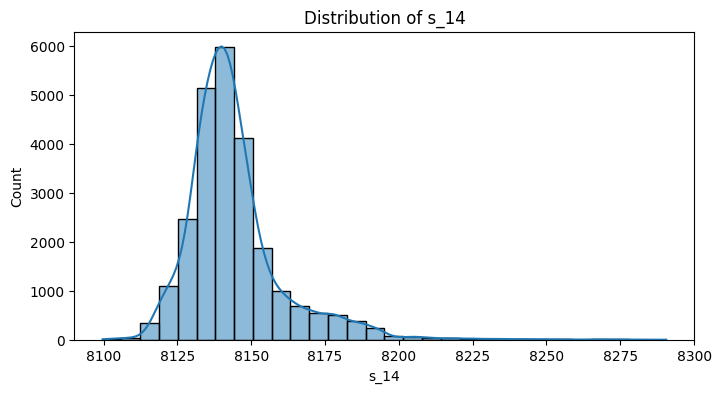

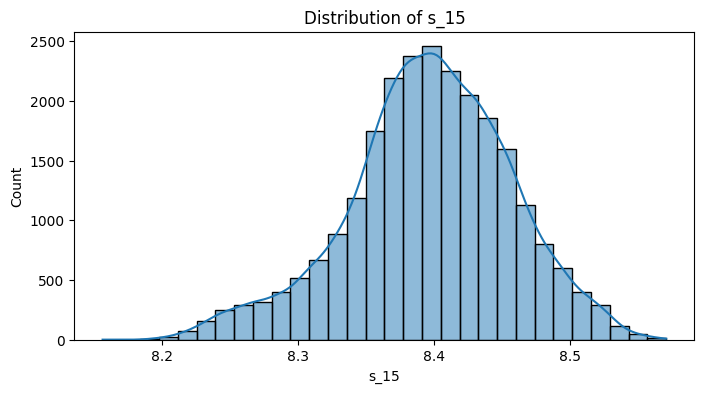

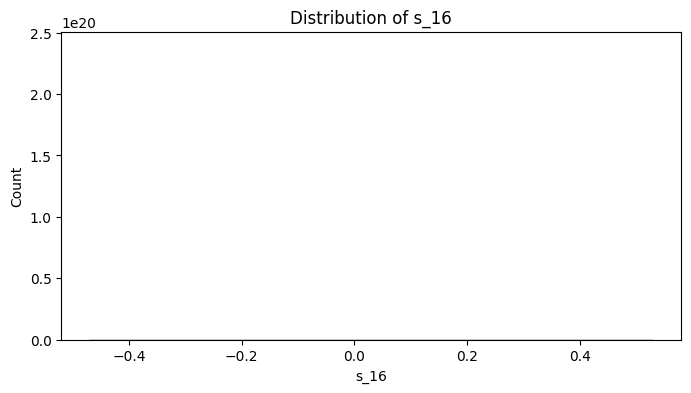

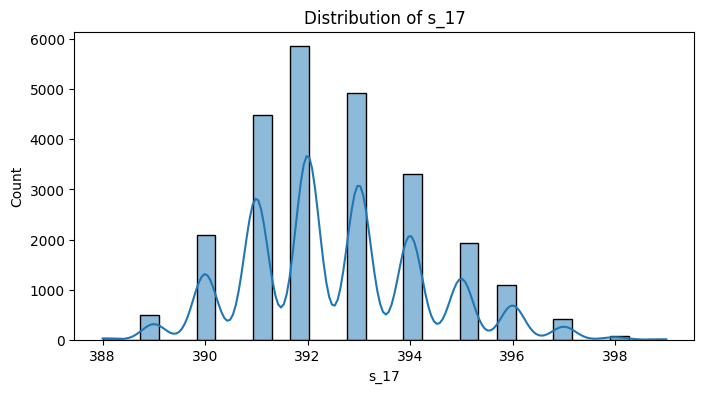

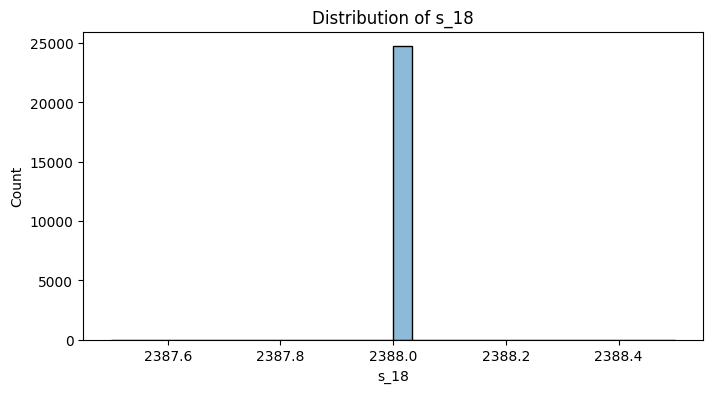

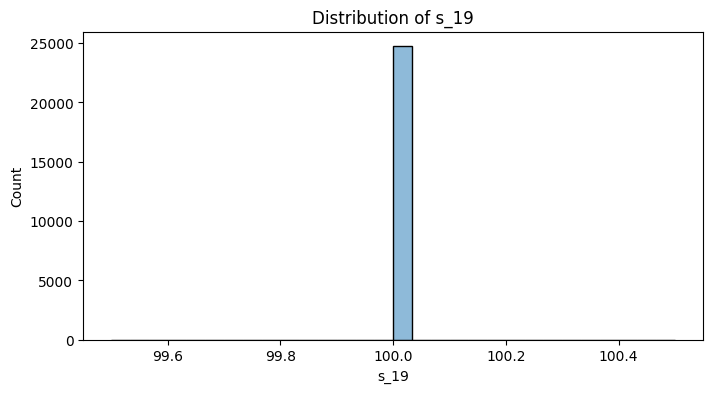

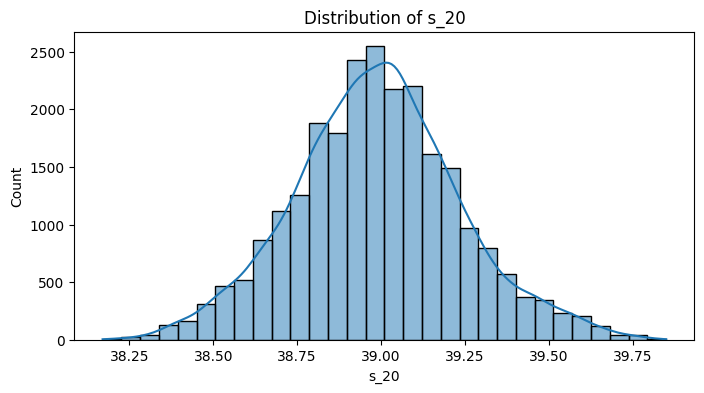

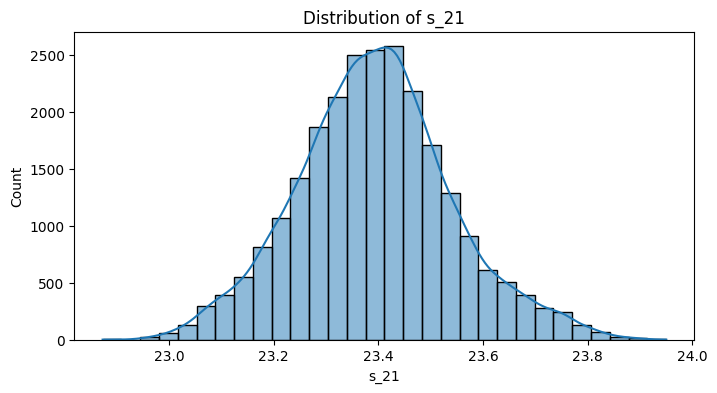

In [19]:
for sensor in sensor_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.show()